## Exploratory Data Analysis

#### Importing Libraries

In [36]:
import sys
sys.path.append('../')
import pandas as pd
from src.utils import check_missing_data
from src.descriptive_statistics import describe_numerical, summarize_categorical, summarize_time_series
from src.plots import display_summary_table, plot_bar_charts,plot_bar_chart, box_plots
import matplotlib.pyplot as plt

#### Loading Data

In [19]:
df_data = pd.read_csv('../data/data.csv')
df_xente = pd.read_csv('../data/Xente_Variable_Definitions.csv')

#### Data Overview

In [20]:
df_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [21]:
df_xente.head()

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account


In [22]:
print(df_data.columns)

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')


In [23]:
print(len(df_data))

95662


##### Catagorization

In [24]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [25]:
df_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [26]:
# Separate numerical, categorical and date columns
df_data_cat = df_data[['BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']]

df_data_num = df_data[['Amount', 'Value']]

df_data_date = df_data[['TransactionStartTime']]

In [27]:
summarize_time_series(df_data_date, 'TransactionStartTime')

Number of Unique Dates: 94556
Start Date: 2018-11-15 02:18:49+00:00
End Date: 2019-02-13 10:01:28+00:00


#### Summary Statistics

In [47]:
unique_transactions = df_data['TransactionId'].unique()
print(len(unique_transactions))

95662


In [50]:
unique_batchs = df_data['BatchId'].unique()
print(len(unique_batchs))

94809


In [51]:
duplicated_batches = df_data[df_data.duplicated(['BatchId'])]
print(len(duplicated_batches))

853


In [52]:
unique_accounts = df_data['AccountId'].unique()
print(len(unique_accounts))

3633


In [53]:
unique_customers = df_data['CustomerId'].unique()
print(len(unique_customers))

3742


In [54]:
unique_subscriptions = df_data['SubscriptionId'].unique()
print(len(unique_subscriptions))

3627


In [55]:
df_data_relevant_cat = df_data_cat[['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']]

In [56]:
data_cat_summary = summarize_categorical(df_data_relevant_cat)
display_summary_table(data_cat_summary)


ProviderId:
+----+--------------+---------+
|    | ProviderId   |   count |
|----+--------------+---------|
|  0 | ProviderId_4 |   38189 |
|  1 | ProviderId_6 |   34186 |
|  2 | ProviderId_5 |   14542 |
|  3 | ProviderId_1 |    5643 |
|  4 | ProviderId_3 |    3084 |
|  5 | ProviderId_2 |      18 |
+----+--------------+---------+

ProductId:
+----+--------------+---------+
|    | ProductId    |   count |
|----+--------------+---------|
|  0 | ProductId_6  |   32635 |
|  1 | ProductId_3  |   24344 |
|  2 | ProductId_10 |   15384 |
|  3 | ProductId_15 |   11964 |
|  4 | ProductId_1  |    2885 |
|  5 | ProductId_4  |    2403 |
|  6 | ProductId_21 |    1512 |
|  7 | ProductId_11 |    1377 |
|  8 | ProductId_19 |     965 |
|  9 | ProductId_14 |     789 |
| 10 | ProductId_13 |     296 |
| 11 | ProductId_2  |     236 |
| 12 | ProductId_20 |     216 |
| 13 | ProductId_8  |     197 |
| 14 | ProductId_24 |     175 |
| 15 | ProductId_22 |     112 |
| 16 | ProductId_7  |      86 |
| 17 | ProductI

In [29]:
data_num_summary = describe_numerical(df_data_num)
display_summary_table(data_num_summary)


Amount:
+----+---------+---------------+
|    | index   |        Amount |
|----+---------+---------------|
|  0 | count   |  95662        |
|  1 | mean    |   6717.85     |
|  2 | std     | 123307        |
|  3 | min     |     -1e+06    |
|  4 | 25%     |    -50        |
|  5 | 50%     |   1000        |
|  6 | 75%     |   2800        |
|  7 | max     |      9.88e+06 |
+----+---------+---------------+

Value:
+----+---------+---------------+
|    | index   |         Value |
|----+---------+---------------|
|  0 | count   |  95662        |
|  1 | mean    |   9900.58     |
|  2 | std     | 123122        |
|  3 | min     |      2        |
|  4 | 25%     |    275        |
|  5 | 50%     |   1000        |
|  6 | 75%     |   5000        |
|  7 | max     |      9.88e+06 |
+----+---------+---------------+


#### Visualizations

##### For Numerical Columns

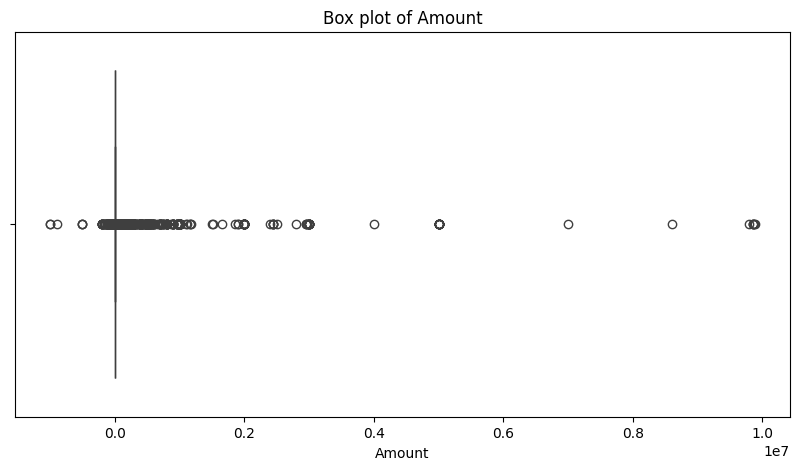

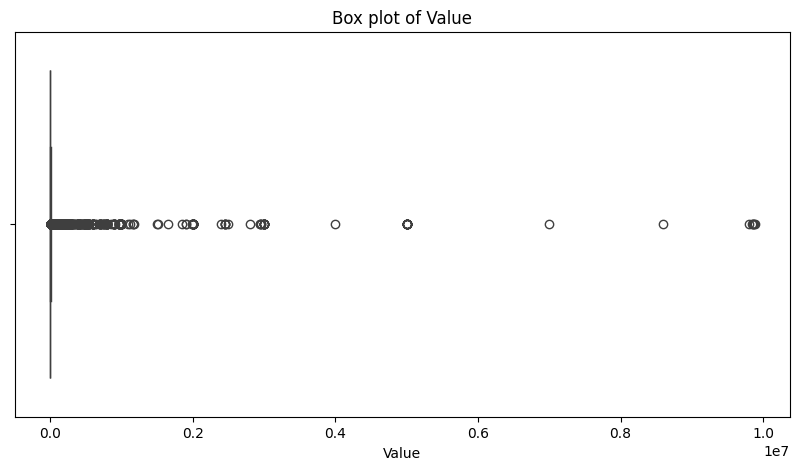

In [31]:
box_plots(df_data_num)

##### For Catagorical Columns

In [34]:
print(df_data_cat.columns)

Index(['BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode',
       'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'PricingStrategy', 'FraudResult'],
      dtype='object')


In [43]:
print(df_data_relevant_cat.columns)

Index(['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId',
       'PricingStrategy', 'FraudResult'],
      dtype='object')


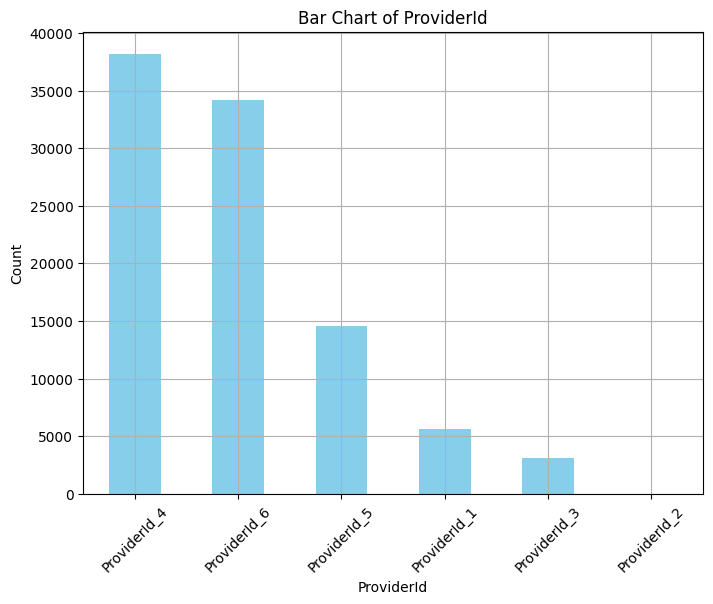

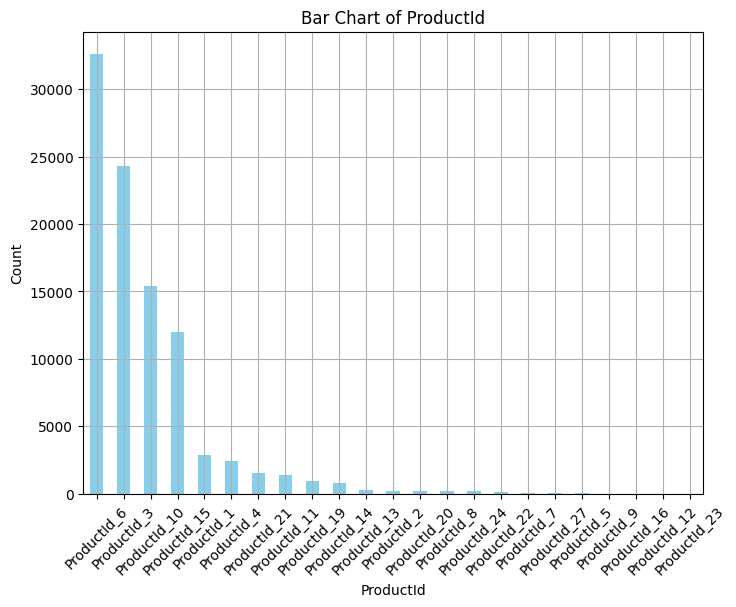

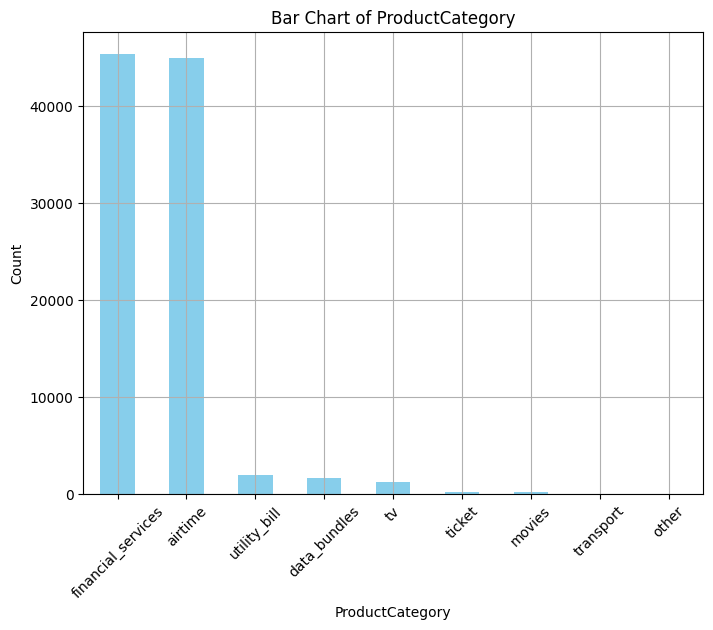

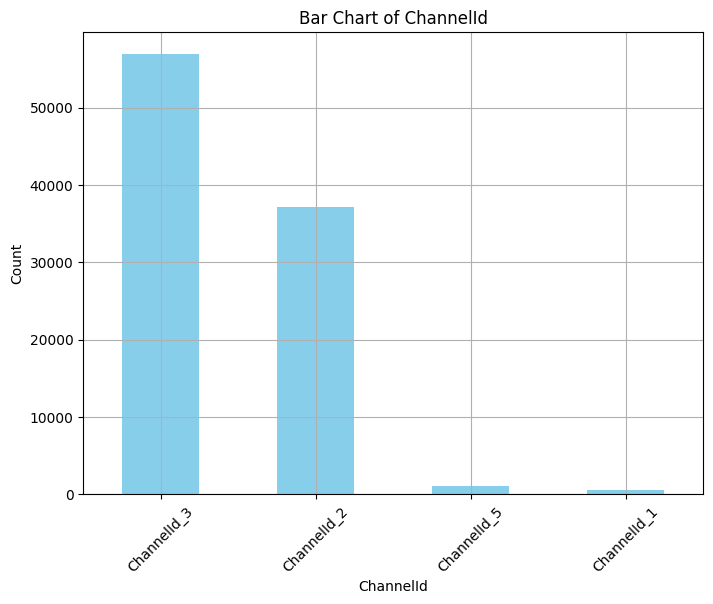

In [42]:
plot_bar_charts(df_data_relevant_cat)

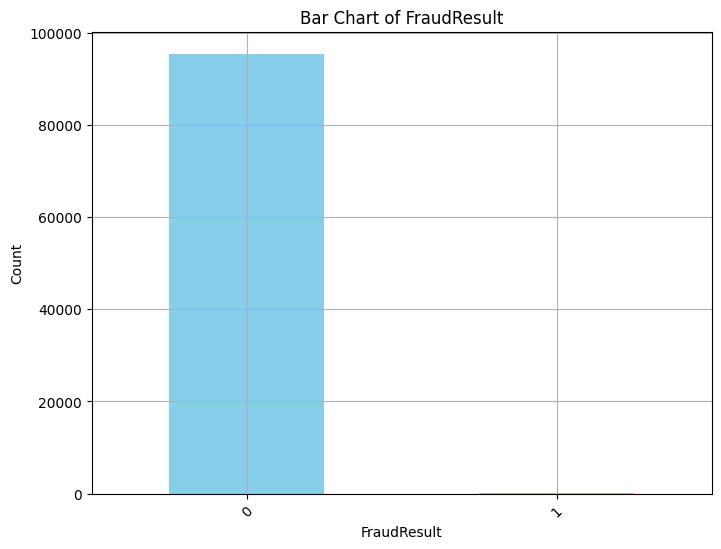

In [44]:
plot_bar_chart(df_data, 'FraudResult')

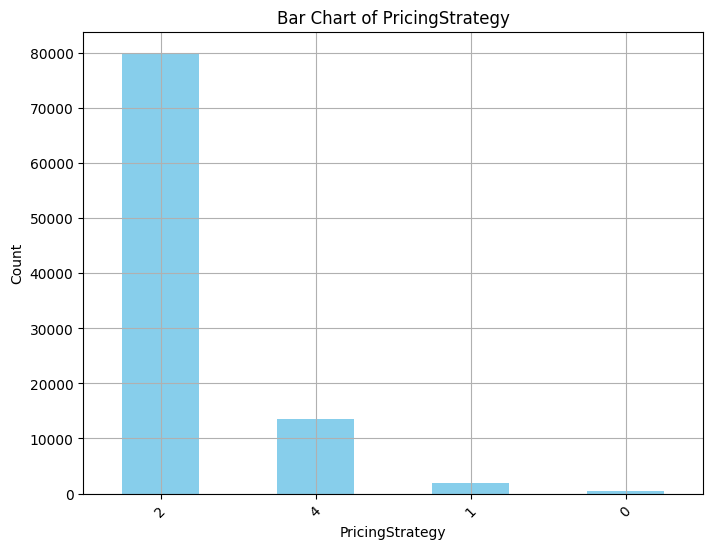

In [45]:
plot_bar_chart(df_data, 'PricingStrategy')

#### Correlations Analysis

In [57]:
# Calculate the correlation between Amount and Value
correlation = df_data['Amount'].corr(df_data['Value'])

# Print the correlation
print(f"The correlation between Amount and Value is: {correlation}")

The correlation between Amount and Value is: 0.9896921359901094


#### Data Quality Assessemnt

In [58]:
check_missing_data(df_data)

'Success: No missing values.'